In [5]:
%matplotlib inline
import numpy as np
import nengo
import pylab
import struct

In [6]:
def read_file_spike_probe(filename):
    f = open(filename, 'rb')
    data = f.read()
    data_spikes = []
    data_nengo_time = []
    data_clock_time = []
    index = 0
    while index < len(data):
        nengo_time, clock_time, count = struct.unpack('ffI', data[index:index+12])
        try:
            spike_indices = struct.unpack('I'*count, data[index+12:index+12+count*4])
        except:
            break
        data_spikes.append(spike_indices)
        data_nengo_time.append(nengo_time)
        data_clock_time.append(clock_time)
        index += 12+count*4
    f.close()
    return np.array(data_spikes), np.array(data_nengo_time), np.array(data_clock_time)

def read_file_value_probe(filename):
    f = open(filename, 'rb')
    data = f.read()
    count = struct.unpack('I', data[0:4])[0]
    print(count)
    
    data_value = []
    data_nengo_time = []
    data_clock_time = []
    index = 4
    while index < len(data):
        try:
            d = struct.unpack('ff'+'f'*count, data[index:index+8+count*4])
        except:
            break
        nengo_time, clock_time, value = d[0], d[1], d[2:]
        
        data_value.append(value)
        data_nengo_time.append(nengo_time)
        data_clock_time.append(clock_time)
        index += 8+count*4
    f.close()
    return np.array(data_value), np.array(data_nengo_time), np.array(data_clock_time)
     


In [18]:
spikes_b, nengo_time_d_b, clock_time_d_b = read_file_spike_probe('basal_spike_data')   
values_b, nengo_time_v_b, clock_time_v_b = read_file_value_probe('basal_value')     

spikes_l, nengo_time_d_l, clock_time_d_l = read_file_spike_probe('lateral_spike_data')   
values_l, nengo_time_v_l, clock_time_v_l = read_file_value_probe('lateral_value')   

spikes_c, nengo_time_d_c, clock_time_d_c = read_file_spike_probe('cortex_spike_data')   
values_c, nengo_time_v_c, clock_time_v_c = read_file_value_probe('cortex_value')   

2
1
2


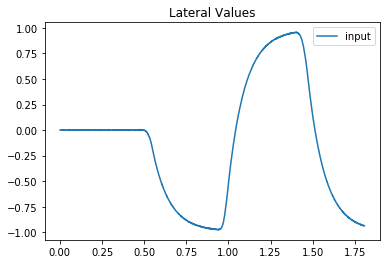

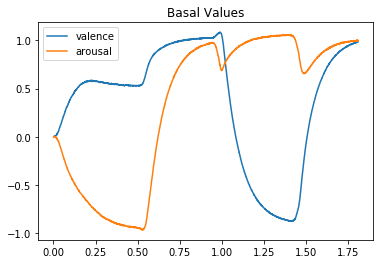

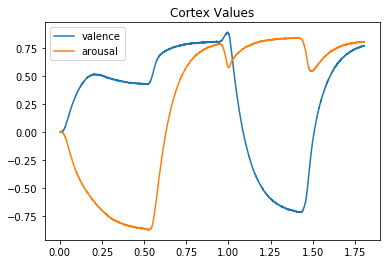

In [19]:
pylab.figure()
pylab.plot(nengo_time_v_l, values_l)
pylab.title('Lateral Values')
pylab.legend(['input'])

pylab.figure()
pylab.plot(nengo_time_v_b, values_b)
pylab.title('Basal Values')
pylab.legend(['valence','arousal'])

pylab.figure()
pylab.plot(nengo_time_v_c, values_c)
pylab.title('Cortex Values')
pylab.legend(['valence','arousal'])

Text(0.5,1,'Cortex')

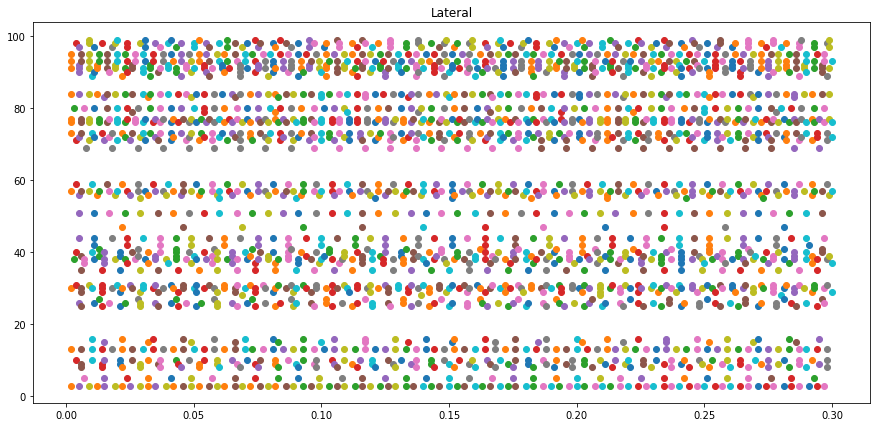

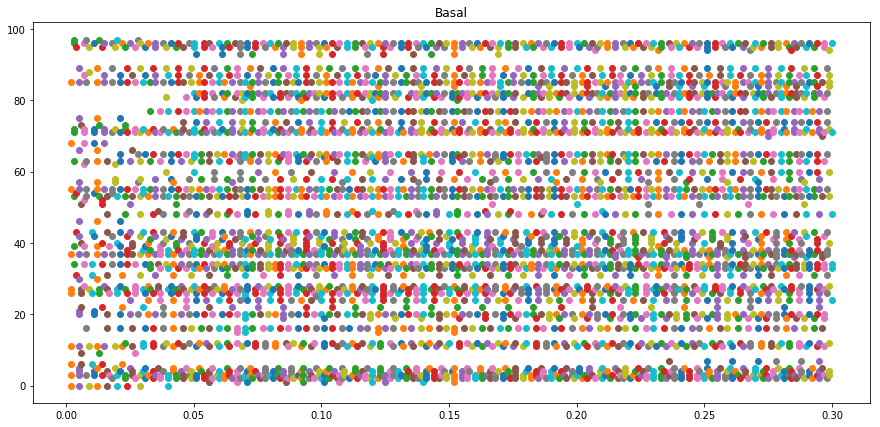

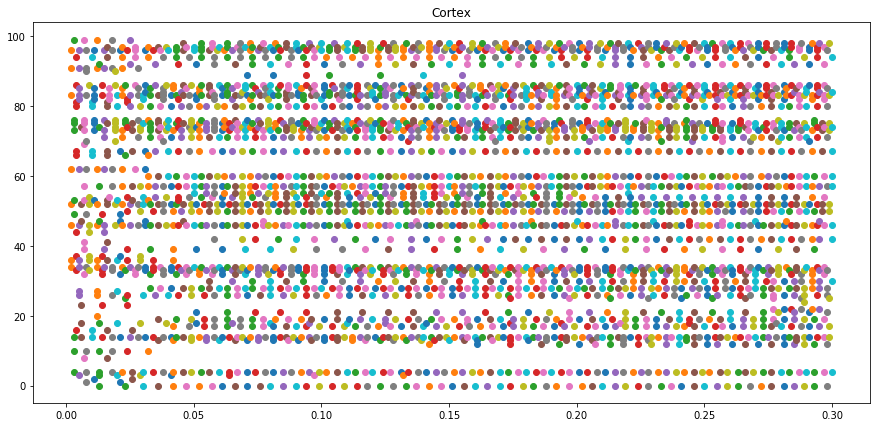

In [25]:
pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_l[:300]):
    spike_indices = spikes_l[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Lateral')

pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_b[:300]):
    spike_indices = spikes_b[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Basal')

pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_c[:300]):
    spike_indices = spikes_c[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Cortex')